# BURGER SET MODELING FOR BUSINESS PROFIT
In this modeling, we will choose to perform 'Association' modeling to get business insight for company's profit. The 'Association' modeling we used are 'Association Rule Learning with Apriori Algorithm'.

## 1. LOAD DATA
Read data to perform Modelling Machine Learning 'Association' by input as 'df' variable

In [9]:
import pandas as pd
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [7]:
df = pd.read_csv('Static Dataset Transaction - Burger Star (Outlet A) .csv')
df.head()

,Timestamp,Type Burger,Code Burger,Amount Burger,Type Drink,Code Drink,Amount Drink,Gender,Payment
0,10:01,Beef burger,1,6,Mineral water,1,3,1,DANA
1,10:04,Cheese burger,3,12,Coke,2,10,0,DANA
2,10:05,Double cheese burger,4,10,Mineral water,1,5,0,LINK AJA
3,10:06,Chicken burger,2,9,Coffe,3,9,0,DANA
4,10:07,Cheese burger,3,11,Coke,2,3,1,DANA


In this case, first, dataframe need to be converted to list as preprocessing step before modeling

In [0]:
df['new'] = df[['Type Burger','Type Drink']].values.tolist() #values.tolist is used to change df to list
df['new'].head()

0             [Beef burger, Mineral water]
1                    [Cheese burger, Coke]
2    [Double cheese burger, Mineral water]
3                  [Chicken burger, Coffe]
4                    [Cheese burger, Coke]
Name: new, dtype: object

## 2. MODELING BY MACHINE LEARNING
The modeling is 'Association Rules Learning with Apriori Algorithm'. <br>
Apriori algorithm is a process used to find frequent-itemset by doing iteration on dataset. Frequent-itemset is an indication of itemset that has a frequency of occurrence more than the minimum value that has been determined. <br>
Association Rule Learning adalah data mining techniques to find associative rules between a combination of items. Support from an association rule is the presentation of combinations of items in a database. Confidence of an association rule is a measure of the accuracy of a rule that can be used to measure the strength of the relationships between items in the association rule. Lift ratio is a measure to determine the strength of the association rule that has been formed and can be useful for predicting the consequent in future data sets. <br>
Meanwhile, itemsets are consist of two combination, which is X is called antecedent or left-hand-side (LHS) and Y is called consequent or right-hand-side (RHS).

In [0]:
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.05)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffe),(Beef burger),0.282051,0.371795,0.089744,0.318182,0.855799,-0.015122,0.921368
1,(Beef burger),(Coffe),0.371795,0.282051,0.089744,0.241379,0.855799,-0.015122,0.946387
2,(Beef burger),(Coke),0.371795,0.221154,0.041667,0.112069,0.506747,-0.040557,0.877147
3,(Coke),(Beef burger),0.221154,0.371795,0.041667,0.188406,0.506747,-0.040557,0.774038
4,(Mineral water),(Beef burger),0.349359,0.371795,0.205128,0.587156,1.579247,0.075238,1.521652


In [0]:
oht = OnehotTransactions() # OnehotTransactions: Encoder class for transaction data in Python lists
oht_ary = oht.fit(df['new']).transform(df['new'])
df1 = pd.DataFrame(oht_ary, columns=oht.columns_)
print (df1) 

     Beef burger  Cheese burger  ...  Mineral water   None
0           True          False  ...           True  False
1          False           True  ...          False  False
2          False          False  ...           True  False
3          False          False  ...          False  False
4          False           True  ...          False  False
5          False          False  ...           True  False
6           True          False  ...           True  False
7           True          False  ...           True  False
8          False          False  ...          False  False
9          False          False  ...          False  False
10         False           True  ...          False  False
11          True          False  ...           True  False
12         False          False  ...          False   True
13          True          False  ...           True  False
14          True          False  ...           True  False
15          True          False  ...           True  Fal

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


In [0]:
frequent_itemsets = apriori(df1, min_support=0.005, use_colnames=True)
print (frequent_itemsets)

     support                               itemsets
0   0.371795                          (Beef burger)
1   0.179487                        (Cheese burger)
2   0.227564                       (Chicken burger)
3   0.282051                                (Coffe)
4   0.221154                                 (Coke)
5   0.221154                 (Double cheese burger)
6   0.349359                        (Mineral water)
7   0.147436                                 (None)
8   0.089744                   (Coffe, Beef burger)
9   0.041667                    (Beef burger, Coke)
10  0.205128           (Mineral water, Beef burger)
11  0.035256                    (Beef burger, None)
12  0.179487                  (Coke, Cheese burger)
13  0.115385                (Coffe, Chicken burger)
14  0.112179                 (None, Chicken burger)
15  0.076923          (Coffe, Double cheese burger)
16  0.144231  (Mineral water, Double cheese burger)


From the support result above, it can be seen that the highest support itemset is {Beef Burger} with support 37%, the second ones is {Mineral Water} with 34%, and the highest combination of two items is {Mineral Water; Beef Burger} with 20%.

## 3. MAKE DESCRIPTIVE VISUALIZATION FOR DATA UNDERSTANDING

In [10]:
# Import the Package to Make the Visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

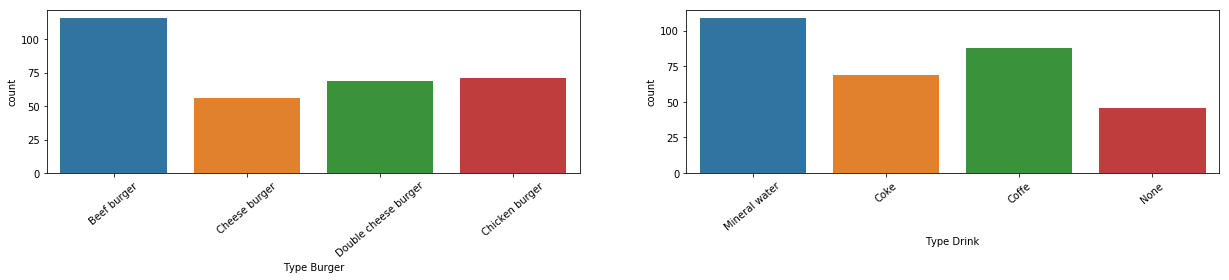

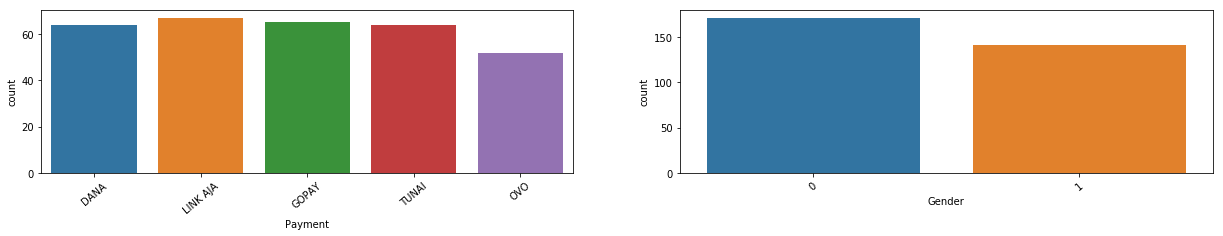

In [11]:
f=plt.figure(figsize=(21,3))
f.add_subplot(1,2,1)
sns.countplot(df['Type Burger'])
plt.xticks(rotation=40)
f.add_subplot(1,2,2)
sns.countplot(df['Type Drink'])
plt.xticks(rotation=40)
f=plt.figure(figsize=(21,3))
f.add_subplot(1,2,1)
sns.countplot(df['Payment'])
plt.xticks(rotation=40)
f.add_subplot(1,2,2)
sns.countplot(df['Gender'])
plt.xticks(rotation=40)
sns.set_context(rc={'axes.labelsize':15, 'ytick.labelsize':15, 'xtick.labelsize':20})